# 05-novelty-times.ipynb

In [4]:
import numpy as np
import pandas as pd
from itertools import *

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
mpl.rcParams['figure.figsize'] = [7,8]
mpl.rcParams['figure.dpi'] = 80
mpl.rcParams['savefig.dpi'] = 200

mpl.rcParams['font.size'] = 17
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['figure.titlesize'] = 'medium'
mpl.rcParams['lines.linewidth'] = 2.5
mpl.rcParams['lines.markersize'] = 10

sns.set_context('talk')

from pprint import pprint

import imp

from scipy.stats import entropy
entropy_fix = np.log2(np.e)

Check that the novelty curve is the same for all K

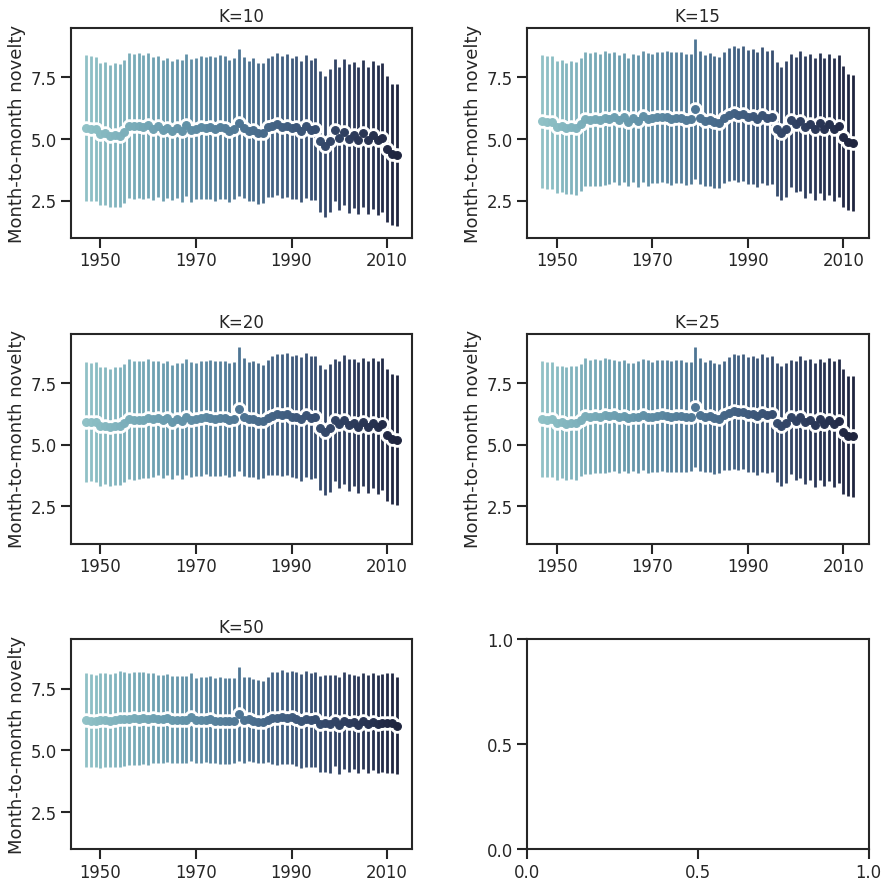

In [8]:
sns.set_context('talk', font_scale=0.9)
sns.set_style('ticks')
Ks = [10,15,20,25,50]
fig, axs = plt.subplots(3,2,figsize=(12,12))
axs = axs.flatten()

for ax,K in zip(axs,Ks):
    infile_years     = 'times_data/df_novelty_{}topics_over_years.csv'.format(K)
    df = pd.read_csv(infile_years, index_col=0)
    df.columns = ['meanKL','stdKL']

    years = df.index
    pal = sns.cubehelix_palette(len(years), rot=-.25, light=.7)
    colour_dict = { y:c for y,c in zip(years, pal) }

    sns.set_context("poster", font_scale=1.5, rc={"lines.linewidth": 2.5})

    x    = df.index.values
    y    = df['meanKL'].values
    yerr = df['stdKL'].values
    c = [colour_dict[i] for i in x]

    ax.plot(x,y, markersize=12, marker='o', c='w');
    for ix, iy, iyerr, ic in zip(x,y,yerr,c):
        ax.errorbar(ix,iy, yerr=iyerr, markersize=7, marker='o', c=ic);

    #ax.set_ylabel(r'Month-to-month $D_{KL}$')
    ax.set_ylabel(r'Month-to-month novelty')
    ax.set_ylim(1,9.5)
    
    xticks = np.arange(1950,2030,20)
    ax.set_xticks(xticks)
    
    ax.set_title('K='+str(K),fontsize=15)

plt.tight_layout()
#plt.savefig('../images-paper/novelty-over-years-Times-many-K.png')
plt.show()

# We have the same data for every week, in:
# infile_yearweeks = 'data/times_df_novelty_{}topics_over_yearweeks.csv'.format(K)    